### Method: 
Random Forest
### Feautre: 
The input features are processed time and location ID. The outputs are the toal number of bike in and total number of bike out. 
### Objective: 
Predict the total number of bike in and bike out for using the previous 6 months data (in 2014).
### Metric: 
MSLE

In [1]:
cd /Users/ali/Dropbox/DeepLearningTest/ML_Challenge

/Users/ali/Dropbox/DeepLearningTest/ML_Challenge


In [2]:
import sys 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor as rfr 
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.model_selection import KFold
import matplotlib.pyplot as p
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
file = '2014_preprocessed_data.csv'
data = np.genfromtxt(file, delimiter=',', skip_header=1)
np.random.shuffle(data)
x = data[:,:2]
y = data[:,2:]
print(x.shape)
print(y.shape)

(1985599, 2)
(1985599, 2)


In [4]:
x = x[:len(x)/2]
y = y[:len(y)/2]

x_val = x[:1000]
y_val = y[:1000]

x = x[1000:]
y = y[1000:]

In [5]:
model = rfr(n_estimators=10, criterion='mse', n_jobs=7, verbose=0)

In [6]:
kf = KFold(n_splits=5)
d = {}
for train, test in kf.split(x):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    w = model.fit(x_train, y_train)
    pred_test = w.predict(x_test)
    m_test = msle(y_test, pred_test)
    print("msle for testing set is: ", m_test)
    pred = w.predict(x_val)
    m_val = msle(y_val, pred)
    print("msle for validation set is ", m_val )
    d[m_test*0.3 + m_val*0.7] = w

('msle for testing set is: ', 0.5086388902505872)
('msle for validation set is ', 0.5242744304814284)
('msle for testing set is: ', 0.5114968910696327)
('msle for validation set is ', 0.5232271082395564)
('msle for testing set is: ', 0.5087719710258334)
('msle for validation set is ', 0.5446637099341193)
('msle for testing set is: ', 0.5052927323910462)
('msle for validation set is ', 0.5468376558345973)
('msle for testing set is: ', 0.503539522846911)
('msle for validation set is ', 0.5289457817826131)


In [7]:
best = d[min(d.keys())]
w = best.fit(x_train, y_train)
pred = w.predict(x_val)

In [8]:
x_test = x[5*len(x)/12:6*len(x)/12]
y_test = y[5*len(y)/12:6*len(x)/12]

In [9]:
pred = w.predict(x_test)

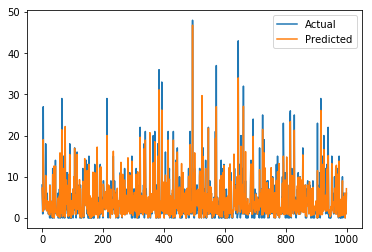

In [10]:
bike_in_actual = y_test[:,0]
bike_in_pred = pred[:,0]

plt.plot(bike_in_actual[:1000])
plt.plot(bike_in_pred[:1000])
plt.legend(['Actual','Predicted'])

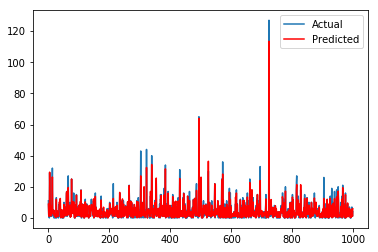

In [11]:
bike_out_actual = y_test[:,1]
bike_out_pred = pred[:,1]

plt.plot(bike_out_actual[:1000])
plt.plot(bike_out_pred[:1000],'r')
plt.legend(['Actual','Predicted'])